# Breast Cancer Detection model:

**Algorithms:** Random Forest and Decision Trees

**Libraries:** sklearn, pandas, matplot, seaborn and graphviz

# 1. Imported the dataset and performed EDA:

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('E:\ML\health\BreastCancer.csv')

In [7]:
df.head()

,Unnamed: 0,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,...,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,y
0,1,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,B
1,2,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,B
2,3,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,B
3,4,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,B
4,5,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,B


In [8]:
df = df.iloc[:, 1:] # removed the Unnamed coulumn 

In [9]:
df.head()

,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,x.fractal_dim_mean,...,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,y
0,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,B
1,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,B
2,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,B
3,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,B
4,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,B


In [10]:
df.shape

(569, 31)

In [11]:
df.isna().sum() # checked is there any missing values in the dataset

x.radius_mean          0
x.texture_mean         0
x.perimeter_mean       0
x.area_mean            0
x.smoothness_mean      0
x.compactness_mean     0
x.concavity_mean       0
x.concave_pts_mean     0
x.symmetry_mean        0
x.fractal_dim_mean     0
x.radius_se            0
x.texture_se           0
x.perimeter_se         0
x.area_se              0
x.smoothness_se        0
x.compactness_se       0
x.concavity_se         0
x.concave_pts_se       0
x.symmetry_se          0
x.fractal_dim_se       0
x.radius_worst         0
x.texture_worst        0
x.perimeter_worst      0
x.area_worst           0
x.smoothness_worst     0
x.compactness_worst    0
x.concavity_worst      0
x.concave_pts_worst    0
x.symmetry_worst       0
x.fractal_dim_worst    0
y                      0
dtype: int64

In [12]:
df.duplicated().sum() # checked is there any duplicated values

0

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
x = ['Benign', 'Malignant']
y = df['y'].value_counts()
colors = ['g', 'r']

<BarContainer object of 2 artists>

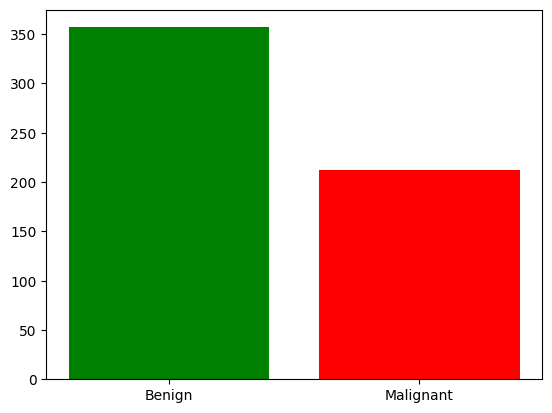

In [15]:
plt.bar(x, y, color=colors) # visual representation of number of benign and malignant cancer patients.

# 2. Split the dataset into train and test:

In [16]:
df_x = df.iloc[:, 0:30].values
df_y = df.iloc[:, 30]

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
sc = StandardScaler()
df_x = sc.fit_transform(df_x)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=42)

# 3. Trained the model: Decision Tree vs. Random Forest

**1. Decision Tree:**

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
dt = DecisionTreeClassifier()

In [23]:
dt.fit(x_train, y_train)

DecisionTreeClassifier()

**2. Random Forest:**

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
rf = RandomForestClassifier(n_estimators=300)

In [26]:
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=300)

# 4. Testing phase:

**1. Decision Tree:**

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [29]:
y_pred1 = dt.predict(x_test)

In [30]:
print("Accuracy Score: ", accuracy_score(y_test, y_pred1))

Accuracy Score:  0.9210526315789473


Text(0.5, 1.0, 'Confusion Matrix of Decision Tree')

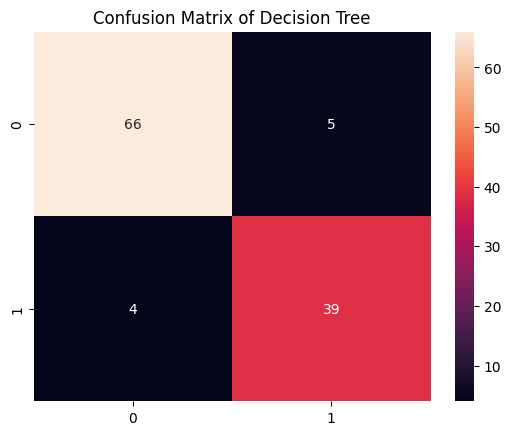

In [31]:
sns.heatmap(confusion_matrix(y_test, y_pred1), annot=True)
plt.title("Confusion Matrix of Decision Tree")

**2. Random Forest:**

In [32]:
y_pred2 = rf.predict(x_test)

In [33]:
print("Accuracy Score: ", accuracy_score(y_test, y_pred2))

Accuracy Score:  0.9385964912280702


Text(0.5, 1.0, 'Confusion Matrix of Random Forest')

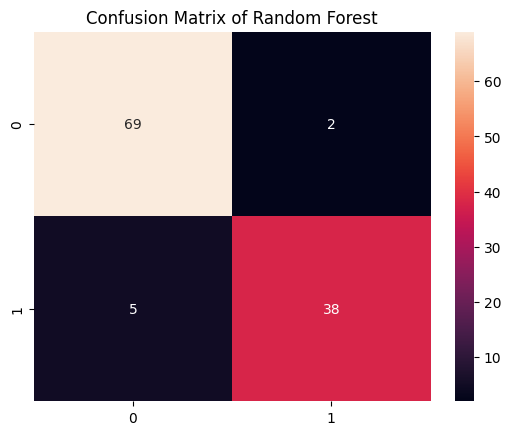

In [34]:
sns.heatmap(confusion_matrix(y_test, y_pred2), annot=True)
plt.title("Confusion Matrix of Random Forest")

**Conclusion:** Random Forest outperforms Decision Tree

# 5. Viusalization of random Decision Trees from Random Forest:

[Text(0.6071428571428571, 0.9166666666666666, 'x[7] <= 0.136\ngini = 0.467\nsamples = 279\nvalue = [286, 169]'),
 Text(0.35714285714285715, 0.75, 'x[26] <= -0.268\ngini = 0.068\nsamples = 177\nvalue = [274, 10]'),
 Text(0.21428571428571427, 0.5833333333333334, 'x[23] <= 0.586\ngini = 0.018\nsamples = 139\nvalue = [221, 2]'),
 Text(0.14285714285714285, 0.4166666666666667, 'x[13] <= -0.003\ngini = 0.009\nsamples = 138\nvalue = [221, 1]'),
 Text(0.07142857142857142, 0.25, 'gini = 0.0\nsamples = 134\nvalue = [216, 0]'),
 Text(0.21428571428571427, 0.25, 'x[16] <= -0.684\ngini = 0.278\nsamples = 4\nvalue = [5, 1]'),
 Text(0.14285714285714285, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.2857142857142857, 0.08333333333333333, 'gini = 0.0\nsamples = 3\nvalue = [5, 0]'),
 Text(0.2857142857142857, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5, 0.5833333333333334, 'x[13] <= -0.141\ngini = 0.228\nsamples = 38\nvalue = [53, 8]'),
 Text(0.42857

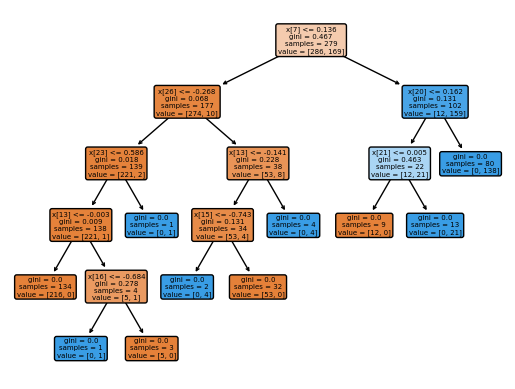

In [35]:
from sklearn.tree import plot_tree
from sklearn import tree
import graphviz
tree.plot_tree(rf.estimators_[0], rounded=True, filled=True)

[Text(0.4739583333333333, 0.9444444444444444, 'x[27] <= 0.056\ngini = 0.48\nsamples = 291\nvalue = [273, 182]'),
 Text(0.3333333333333333, 0.8333333333333334, 'x[22] <= 0.594\ngini = 0.092\nsamples = 168\nvalue = [256, 13]'),
 Text(0.2916666666666667, 0.7222222222222222, 'x[12] <= 0.618\ngini = 0.045\nsamples = 165\nvalue = [256, 6]'),
 Text(0.20833333333333334, 0.6111111111111112, 'x[7] <= 0.722\ngini = 0.023\nsamples = 162\nvalue = [254, 3]'),
 Text(0.16666666666666666, 0.5, 'x[3] <= 0.227\ngini = 0.016\nsamples = 161\nvalue = [254, 2]'),
 Text(0.08333333333333333, 0.3888888888888889, 'x[23] <= -0.399\ngini = 0.008\nsamples = 157\nvalue = [249, 1]'),
 Text(0.041666666666666664, 0.2777777777777778, 'gini = 0.0\nsamples = 126\nvalue = [204, 0]'),
 Text(0.125, 0.2777777777777778, 'x[12] <= -0.694\ngini = 0.043\nsamples = 31\nvalue = [45, 1]'),
 Text(0.08333333333333333, 0.16666666666666666, 'x[7] <= -0.691\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.041666666666666664, 0.0555555

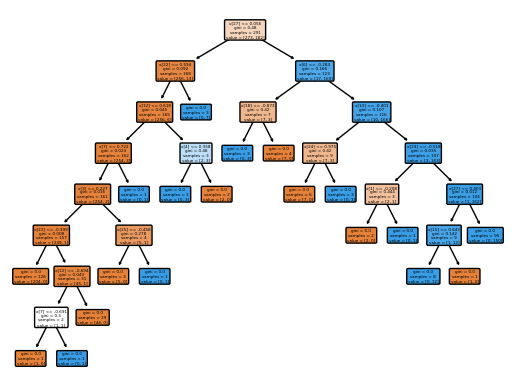

In [41]:
tree.plot_tree(rf.estimators_[5], rounded=True, filled=True)